In [1]:
# 导入自己写的函数
from regression_ import read_data, linear, lasso, ridge, error, train_model, display, kregression

# 导入其他库
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler

file = '../data/abalone.data'

### 1．使用基于梯度下降的标准线性回归进行预测
- 计算函数
  $$
  \hat Y=f(X)=WX=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\theta_4x_4+\theta_5x_5+\theta_6x_6+\theta_7x_7+\theta_8x_8
  $$
  
- 损失函数：使用标准线性回归的损失函数
  $$
  L(X)=\frac1n(\hat Y-Y)^2=\frac1n(WX-Y)^2
  $$

- 梯度
  $$
  \frac{\partial L}{\partial W}=\frac{\partial \frac1n(WX-Y)^2}{\partial W}=\frac1n\frac{\partial (WX-Y)^2}{\partial W}=\frac2n(WX-Y)X
  $$

- 权重更新
  $$
  W' = W - \alpha*\frac{\partial L}{\partial W}
  $$

**比较原始数据和不同特征缩放方法对梯度法的影响**

使用基于梯度下降的标准线性回归对原始数据以及不同特征缩放进行对比如下表所示

| 缩放方法 | min-MSE | avg-MSE |
| -------- | ------- | ------- |
| 原始数据 | 4.2794  | 5.5139  |
| 标准化   | 3.7772  | 5.0305  |
| 归一化   | 4.5989  | 5.8434  |

**可以看出数据未作标准化处理时误差最大，归一化次之，标准化处理的训练结果最好**

train_model 执行时间：2.8836 秒
train_model 执行时间：2.9711 秒
train_model 执行时间：2.9273 秒
None : {'min-MSE': 4.279432963360246, 'avg-MSE': 5.513991930437823}
standard : {'min-MSE': 3.777213644646376, 'avg-MSE': 5.030484042214821}
one : {'min-MSE': 4.598931693411068, 'avg-MSE': 5.843415465626855}


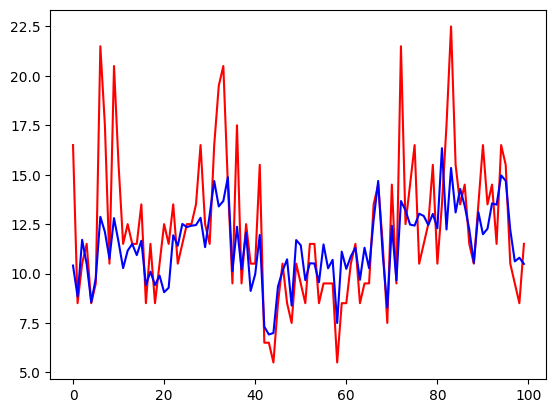

In [2]:
# 比较原始数据和不同特征缩放方法对梯度法的影响

# 创建模式列表
mode = ['None', 'standard', 'one']

# 创建列表存储结果
outcome = {}

# 循环对比三种模式
for each in mode:

    # 读取数据
    data = read_data(file, mode=each, header_insert=True)

    # 分离X与y
    x_ind = ['x_0', 'gender', 'length', 'diameter', 'height', 'weight', 'non-shell weight', 'organ weight', 'shell weight']
    X = np.array(data[x_ind])
    y = np.array(data['age'])

    # 使用基于梯度下降的标准线性回归获取十折验证结果
    Error, W = train_model(X, y, func='linear', alpha=0.1, iter=1000, export_w=True)

    # 记录结果
    outcome[each] = {'min-MSE':min(Error), 'avg-MSE':np.average(Error)}

# 打印结果
for each in outcome:
    print(each,':', outcome[each])
# 蓝色为预测值，红色为实际值
display(W, X[:100], y[:100])


**数据均值归一化，分析不同学习率α和初值对梯度法的影响**

学习率的异质性划分为0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.4, 0.5并分析其对梯度法的影响，如下表所示


In [3]:
# 读取数据
data = read_data(file, mode='one', header_insert=True)

# 分离X与y
# 分离X与y
x_ind = ['x_0', 'gender', 'length', 'diameter', 'height', 'weight', 'non-shell weight', 'organ weight', 'shell weight']
X = np.array(data[x_ind])
y = np.array(data['age'])

In [4]:
# 数据均值归一化，分析不同学习率α和初值对梯度法的影响

# 对比的alpha值列表
alpha = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.42, 0.5]

# 创建结果列表
outcome = []

for each in alpha:
    Error = train_model(X, y,  func='linear', alpha=each, iter=1000)

    # 学习率为each对应的结果
    des = {'min':min(Error), 'avg':np.average(Error)}

    # 添加到结果列表
    outcome.append([each, des])

# 打印结果
for each in outcome:
    print(each)

train_model 执行时间：2.9223 秒
train_model 执行时间：2.8867 秒
train_model 执行时间：2.9169 秒
train_model 执行时间：2.9129 秒
train_model 执行时间：2.9290 秒
train_model 执行时间：2.9873 秒
train_model 执行时间：2.9915 秒
train_model 执行时间：3.0133 秒
train_model 执行时间：2.9684 秒
train_model 执行时间：3.0229 秒
train_model 执行时间：2.8786 秒
[0.001, {'min': 6.583429180210877, 'avg': 7.85811635019239}]
[0.005, {'min': 5.890522848296157, 'avg': 7.08262085911826}]
[0.01, {'min': 5.635251043522028, 'avg': 6.9065591206722186}]
[0.02, {'min': 5.411624383385826, 'avg': 6.7229306139464}]
[0.05, {'min': 5.015135317469236, 'avg': 6.307569443078816}]
[0.1, {'min': 4.598931693411068, 'avg': 5.843415465626855}]
[0.2, {'min': 4.207769167899739, 'avg': 5.385120081922759}]
[0.3, {'min': 4.064764444104401, 'avg': 5.205056394660466}]
[0.4, {'min': 4.007277931595724, 'avg': 5.128901460695728}]
[0.42, {'min': 4.0002750605790265, 'avg': 5.119591220130933}]
[0.5, {'min': 2.2896099154379738e+250, 'avg': 5.165037937803567e+262}]


当学习率增大时，程序运行时间不断减小，并且拟合效果也越来越好。但是，当学习率达到0.5时，误差大幅增加，发生了梯度爆炸的现象。

以下测试了学习率为0.42的情况下增加迭代数的结果，可以看出结果并无变化

train_model 执行时间：2.9061 秒
4.0002750605790265 5.119591220130933


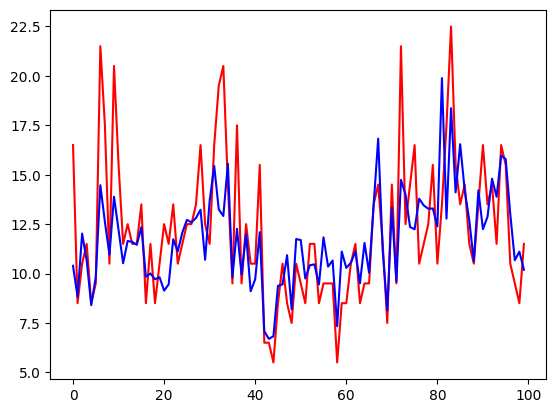

In [5]:
# 针对0.42学习率增加迭代数

# 使用标准线性回归进行训练
e, W = train_model(X, y,  func='linear', alpha=0.42, iter=10000, export_w=True)

# 打印结果
print(min(e), np.average(e))

# 画图
display(W, X[:100], y[:100])

### 2. 使用Lasso回归和岭回归进行预测

In [6]:
# 数据均值归一化，分析不同学习率α和初值对梯度法的影响

# 读取数据
data = read_data(file, mode='one', header_insert=True)

# 分离X与y
# 分离X与y
x_ind = ['x_0', 'gender', 'length', 'diameter', 'height', 'weight', 'non-shell weight', 'organ weight', 'shell weight']
X = np.array(data[x_ind])
y = np.array(data['age'])

# 使用不同的lambda值
lam = [0.1, 0.2, 0.5, 0.8, 1.0, 2.0]

# 创建lasso回归的结果列表
outcome_lasso = []

# 创建岭回归的结果列表
outcome_ridge = []

# 对lasso回归和岭回归运用十折验证
for each in lam:
    # 分别获得岭回归和lasso回归的误差
    error_lasso = train_model(X, y,  func='lasso', alpha=0.05, iter=1000)
    error_ridge = train_model(X, y,  func='ridge', alpha=0.05, iter=1000)
    
    # 分别记录结果
    des_lasso = {'min':min(error_lasso), 'avg':np.average(error_lasso)}
    outcome_lasso.append([each, des_lasso])

    des_ridge = {'min':min(error_ridge), 'avg':np.average(error_ridge)}
    outcome_ridge.append([each, des_ridge])

# 输出结果
print('lasso')
for each in outcome_lasso:
    print(each)

print('\n')
print('ridge')
for each in outcome_ridge:
    print(each)

train_model 执行时间：1.8629 秒
train_model 执行时间：1.7798 秒
train_model 执行时间：1.7479 秒
train_model 执行时间：1.7426 秒
train_model 执行时间：1.8784 秒
train_model 执行时间：1.8881 秒
train_model 执行时间：1.8952 秒
train_model 执行时间：1.7344 秒
train_model 执行时间：1.8425 秒
train_model 执行时间：1.8171 秒
train_model 执行时间：1.7788 秒
train_model 执行时间：1.9153 秒
lasso
[0.1, {'min': 5.449387882075798, 'avg': 6.9678915259532985}]
[0.2, {'min': 5.449387882075798, 'avg': 6.9678915259532985}]
[0.5, {'min': 5.449387882075798, 'avg': 6.9678915259532985}]
[0.8, {'min': 5.449387882075798, 'avg': 6.9678915259532985}]
[1.0, {'min': 5.449387882075798, 'avg': 6.9678915259532985}]
[2.0, {'min': 5.449387882075798, 'avg': 6.9678915259532985}]


ridge
[0.1, {'min': 6.619379088439912, 'avg': 8.333525545294332}]
[0.2, {'min': 6.619379088439912, 'avg': 8.333525545294332}]
[0.5, {'min': 6.619379088439912, 'avg': 8.333525545294332}]
[0.8, {'min': 6.619379088439912, 'avg': 8.333525545294332}]
[1.0, {'min': 6.619379088439912, 'avg': 8.333525545294332}]
[2.0, {'

可以看出，在用lasso回归和岭回归进行训练时，不同的lambda对结果没有影响
下面展示lasso和岭回归的拟合效果

train_model 执行时间：1.8786 秒
lasso 11.842589892533464 17.029247822585056


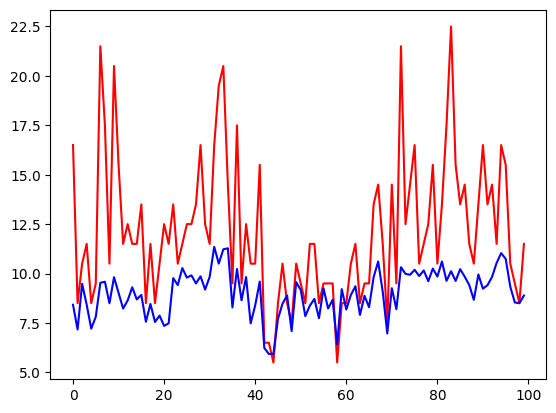

train_model 执行时间：1.8809 秒
ridge 6.619379088387548 8.333525545232025


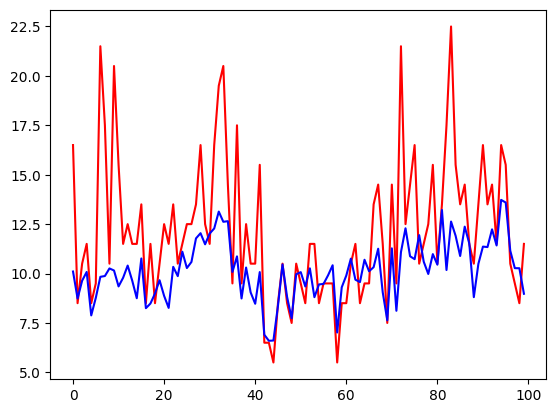

In [7]:
e, W = train_model(X, y,  func='lasso', alpha=0.42, iter=10000, export_w=True)

# 打印结果
print('lasso', min(e), np.average(e))

# 画图
display(W, X[:100], y[:100])

e, W = train_model(X, y,  func='ridge', alpha=0.1, iter=10000, export_w=True)

# 打印结果
print('ridge', min(e), np.average(e))

# 画图
display(W, X[:100], y[:100])

### 3. 使用局部加权线性回归进行预测并分析k值对结果的影响
将k值设定为0.05, 0.1, 0.2, 0.4, 0.5, 0.8, 1, 2, 5, 8训练数据并获得测试集的测试效果，根据以下结果可以看出，当k值为2时，测试集的表现最好

In [8]:
# 创建k值列表
ks = [0.05, 0.1, 0.2, 0.4, 0.5, 0.8, 1, 2, 5, 8]

outcome = []

for each in ks:
    error = train_model(X, y, func='k', k=each)
    outcome.append([each, min(error), np.average(error)])

for each in outcome:
    print(each)

train_model 执行时间：1.7622 秒
train_model 执行时间：2.3617 秒


### 4.分析影响鲍鱼年龄的主要因素

train_model 执行时间：2.9593 秒
linear 5.119591220130933 [  5.14038296   0.12759404   1.76541106   6.12636659   5.58263217
   4.25925179 -16.6830992   -1.88671405  17.17855964]
train_model 执行时间：1.7396 秒
lasso 17.029247822585056 [ 4.965953   -0.34807633  0.19425771  6.86025702 -0.01381072  0.01527636
 -0.11560496  0.06236363  0.92000125]
train_model 执行时间：1.7901 秒
ridge 8.333525545232025 [4.81550124 1.32739354 3.02470462 3.01215483 0.66351168 1.48773652
 0.96952223 1.14969726 1.44023053]


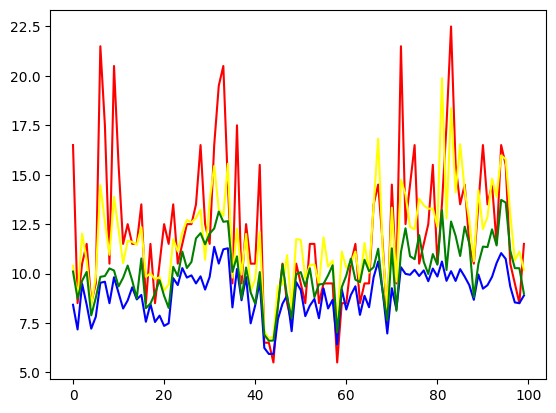

In [ ]:
tes_x, tes_y = X[:100], y[:100]

Error, W_1 = train_model(X, y,  func='linear', alpha=0.42, iter=1000, export_w=True)
yt_1 = tes_x @ W_1
print('linear', np.average(Error), W_1)

Error, W_2 = train_model(X, y,  func='lasso', alpha=0.42, iter=1000, export_w=True)
yt_2 = tes_x @ W_2
print('lasso', np.average(Error), W_2)

Error, W_3 = train_model(X, y,  func='ridge', alpha=0.1, iter=1000, export_w=True)
yt_3 = tes_x @ W_3
print('ridge', np.average(Error), W_3)

plt.plot(tes_y, 'red')
plt.plot(yt_1, 'yellow')
plt.plot(yt_2, 'blue')
plt.plot(yt_3, 'green')
plt.show()

可以看出标准线性的拟合效果最好，其对应的$\theta$为[5.14038296   0.12759404   1.76541106   6.12636659   5.58263217    4.25925179 -16.6830992   -1.88671405  17.17855964], 可以看出$\theta_6$和$\theta_8$对应的权重最大，即无壳重量和壳的重量，接下来仅考虑这两个因素进行拟合如下图所示。可以看出拟合效果较好，因此，影响鲍鱼年龄的主要因素是**无壳重量和壳的重量**。

train_model 执行时间：0.2604 秒
20.71191789257499 22.526368230929346


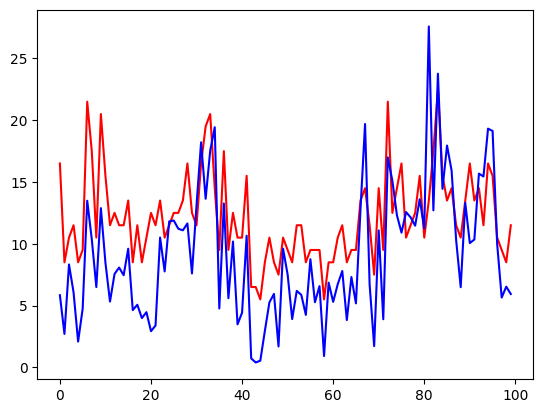

In [ ]:
# 仅考虑无壳重量和壳的重量构造数据集
col_new = ['non-shell weight', 'shell weight']
X_new = np.array(data[col_new])


e, W = train_model(X_new, y,  func='linear', alpha=0.42, iter=10000, export_w=True)

# 打印结果
print(min(e), np.average(e))

# 画图
display(W, X_new[:100], y[:100])

### 5.比较以上4种回归方法的预测效果
将四种方法放在一起进行比较

train_model 执行时间：2.8832 秒
linear 4.0002750605790265 5.119591220130933
train_model 执行时间：1.7648 秒
lasso 11.842589892533464 17.029247822585056
train_model 执行时间：1.7460 秒
ridge 6.619379088387548 8.333525545232025
train_model 执行时间：2.3703 秒
k 3.677537885702209 4.9818452723360975


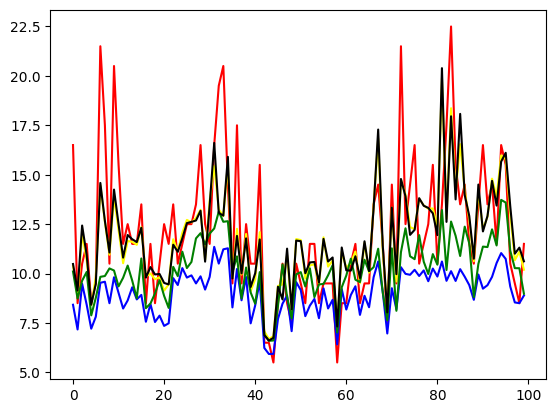

In [ ]:
tes_x, tes_y = X[:100], y[:100]


# 线性回归
Error, W_1 = train_model(X, y,  func='linear', alpha=0.42, iter=1000, export_w=True)
yt_1 = tes_x @ W_1
print('linear', min(Error), np.average(Error))

# lasso
Error, W_2 = train_model(X, y,  func='lasso', alpha=0.42, iter=1000, export_w=True)
yt_2 = tes_x @ W_2
print('lasso', min(Error), np.average(Error))

# ridge
Error, W_3 = train_model(X, y,  func='ridge', alpha=0.1, iter=1000, export_w=True)
yt_3 = tes_x @ W_3
print('ridge', min(Error), np.average(Error))

# k-gression
Error = train_model(X, y,  func='k', k=2)
print('k', min(Error), np.average(Error))
yt_4 = []
for i in range(100):
    yt_4.append(kregression(X[100:], y[100:], tes_x[i], k=2))

yt_4 = np.array(yt_4)

plt.plot(tes_y, 'red')
plt.plot(yt_1, 'yellow')
plt.plot(yt_2, 'blue')
plt.plot(yt_3, 'green')
plt.plot(yt_4, 'black')
plt.show()

根据以上结果可以得出，lasso回归和岭回归的运算速度最快，但其误差也最大。同时，标准线性回归和局部加权线性回归的运算速度稍慢，但同时其误差也较小。其中局部加权平均的拟合效果最好。